In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Glassdoor Gender Pay Gap.csv


In [2]:
import seaborn as sns
from scipy import stats
from scipy.stats import contingency
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/kaggle/input/Glassdoor Gender Pay Gap.csv')

In [4]:
data

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225


<Axes: xlabel='JobTitle', ylabel='count'>

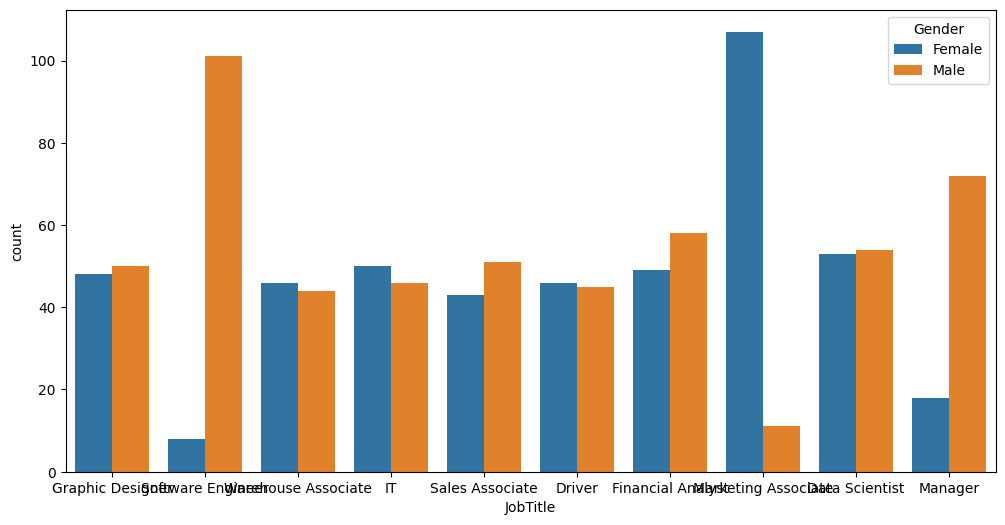

In [5]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='JobTitle', hue='Gender')

In [6]:
jobData = data.groupby(['JobTitle', 'Gender']).size().unstack(fill_value=0)
#ourData['Total']= ourData['Female']+ourData['Male']
jobData

Gender,Female,Male
JobTitle,,
Data Scientist,53,54
Driver,46,45
Financial Analyst,49,58
Graphic Designer,48,50
IT,50,46
Manager,18,72
Marketing Associate,107,11
Sales Associate,43,51
Software Engineer,8,101


<Axes: xlabel='Gender', ylabel='JobTitle'>

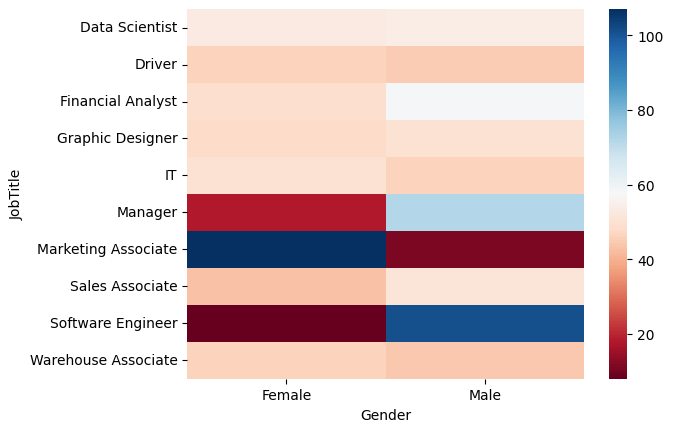

In [7]:
sns.heatmap(jobData,cmap='RdBu')

from the plots it is shown that there are dependancies between gender and some jobs especially sofware engineer, manager and marketing associate positions.

In [8]:
jobDataProp =jobData/jobData.sum()
jobDataProp

Gender,Female,Male
JobTitle,,
Data Scientist,0.113248,0.101504
Driver,0.098291,0.084586
Financial Analyst,0.104701,0.109023
Graphic Designer,0.102564,0.093985
IT,0.106838,0.086466
Manager,0.038462,0.135338
Marketing Associate,0.228632,0.020677
Sales Associate,0.091880,0.095865
Software Engineer,0.017094,0.189850


In [9]:
x2, p_value, dof, expected_freq = stats.chi2_contingency(jobData)
print(f"X2: {x2}, P value: {p_value}, degree of freedom: {dof}")

X2: 188.23545384004152, P value: 9.631049089256313e-36, degree of freedom: 9


Because P value is < 0.05 we rejet the null hypothesis which is the job is prefered equaly by males and females. Furthuer tests are needed to determine which jobs are dependant on gender.


In [10]:
def two_sample_proportion_test(prop1, prop2, sample_size1, sample_size2, significance_level):
    # prop1 and prop2 are the  frequencies of both populations 
    # sample_size1 and sample_size2 are the total number of poplulation 1 and population 2 
    # singificane_level is the critical value/number_of_tests
    
    mu_0 = 0 # null hypothesis mean p1-p2 = 0
    standard_error = np.sqrt((prop1*(1-prop1)/sample_size1) + (prop2*(1-prop2)/sample_size2))
    p_value = stats.norm.sf(abs(prop1 - prop2), loc=mu_0, scale=standard_error) # P_value of the null hypothyses 
    
    
    # Calculating probability of errors
    alternative_mu = prop1 - prop2
    if alternative_mu > 0:
        critical_value = stats.norm.isf(significance_level, loc=mu_0, scale=standard_error) # if alternative is prop1-prop2> 0 then the critival value is 1-significance level it can be considered inverse of the null test 
    else:
        critical_value = stats.norm.ppf(significance_level, loc=mu_0, scale=standard_error)# if alternative is prop1-prop2< 0 then the critival value is significance level
    
    
    if critical_value > alternative_mu:
        beta_error = stats.norm.sf(critical_value, loc=alternative_mu, scale=standard_error)
    else:
        beta_error = stats.norm.cdf(critical_value, loc=alternative_mu, scale=standard_error)
        
    confusion_matrix = np.array([[1-significance_level, significance_level],[beta_error, 1-beta_error]])
    sns.heatmap(confusion_matrix, annot=True, xticklabels=['Fail to reject', 'Reject'], yticklabels=['Ho True', 'Ho False'])
    plt.show()
    
    return p_value, beta_error


Data Scientist


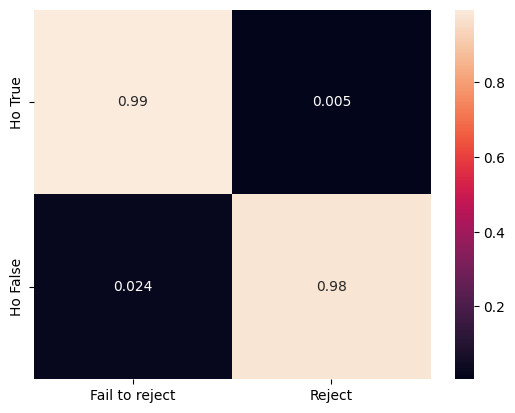

P Value = 0.2750025417789063, beta = 0.02396002195802663
Fail to reject

Driver


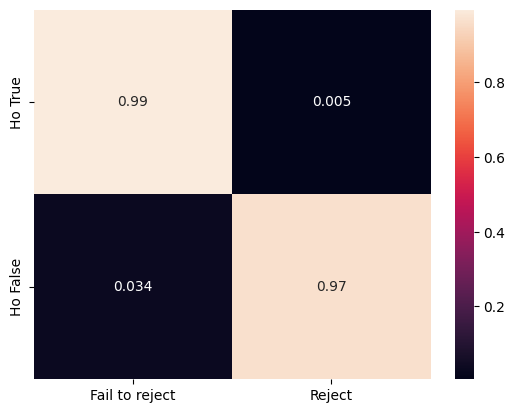

P Value = 0.22698353078097372, beta = 0.033849015921924665
Fail to reject

Financial Analyst


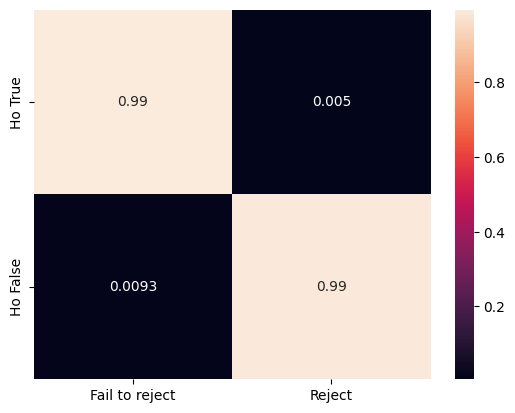

P Value = 0.4125998846962613, beta = 0.009262171528220727
Fail to reject

Graphic Designer


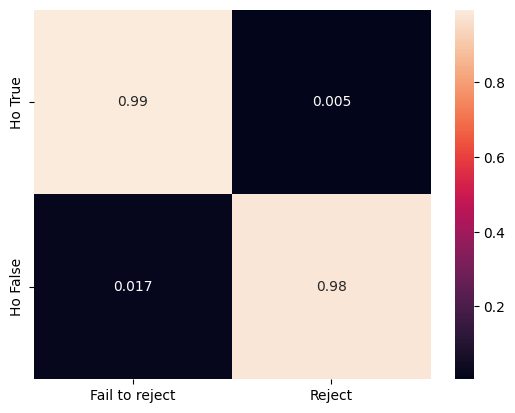

P Value = 0.3248338337633677, beta = 0.01693544500684366
Fail to reject

IT


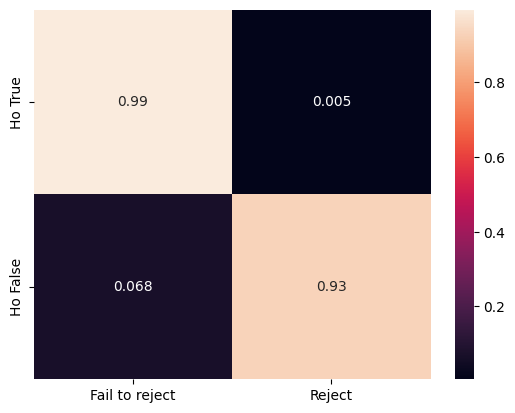

P Value = 0.13891064896652072, beta = 0.06803291936013688
Fail to reject

Manager


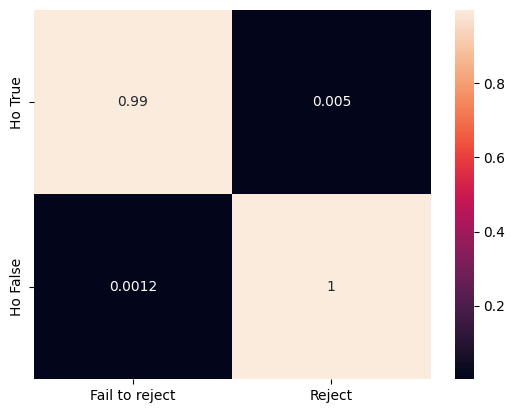

P Value = 1.0555301451638395e-08, beta = 0.001235725407362549
Reject

Marketing Associate


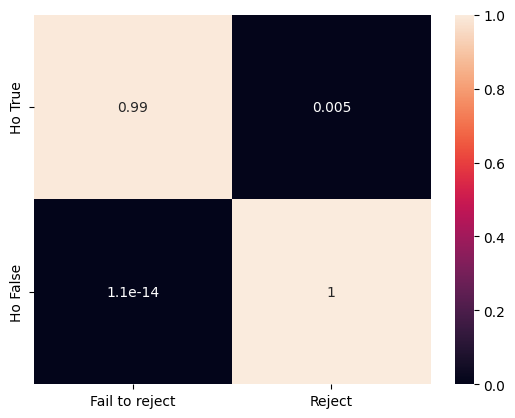

P Value = 8.99986789317581e-25, beta = 1.1418072456627337e-14
Reject

Sales Associate


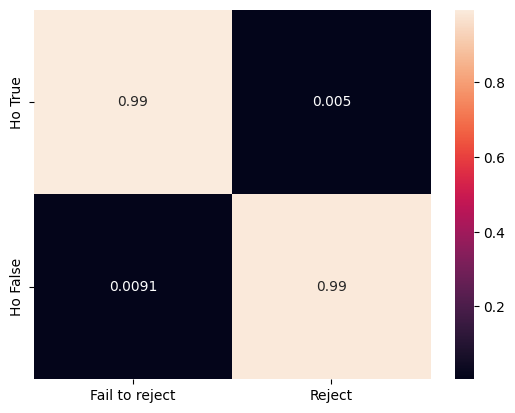

P Value = 0.4146120366344068, beta = 0.009134205020002444
Fail to reject

Software Engineer
no results

Warehouse Associate


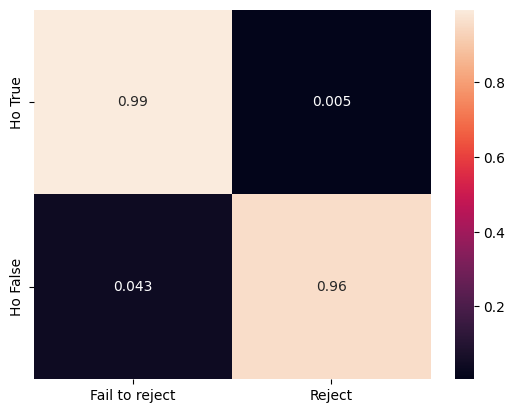

P Value = 0.19619454841333084, beta = 0.04266747810646026
Fail to reject


In [11]:
#using reduced significance level

significance_level = 0.05/len(jobData)
for job in jobData.index:
    print(f"\n{job}")
    p1, p2 = jobDataProp.loc[job]
    n1, n2 = jobData.sum()
    if (n1*p1 >= 10) and (n2*p2 >= 10): 
        p_value, beta = two_sample_proportion_test(p1, p2, n1, n2, significance_level)
        print(f"P Value = {p_value}, beta = {beta}")
        message = "Reject" if p_value < significance_level else "Fail to reject"
        print(message)

    else:
        print("no results")

After studing each job it is shown that all the jobs are not dependant on Gender except for **manager** and **marketing associate** positions. Also, the test for software engineering job position could not be made as it did not satisfy the test criteria which is n*p >10.



# 2 - Department

In [12]:
departmentData = data.groupby(['Dept', 'Gender']).size().unstack(fill_value=0)
#ourData['Total']= ourData['Female']+ourData['Male']
departmentData

Gender,Female,Male
Dept,,
Administration,95,98
Engineering,89,103
Management,87,111
Operations,96,114
Sales,101,106


In [13]:
departmentDataProp = departmentData/departmentData.sum()
departmentDataProp

Gender,Female,Male
Dept,,
Administration,0.202991,0.184211
Engineering,0.190171,0.193609
Management,0.185897,0.208647
Operations,0.205128,0.214286
Sales,0.215812,0.199248


<Axes: xlabel='Dept', ylabel='count'>

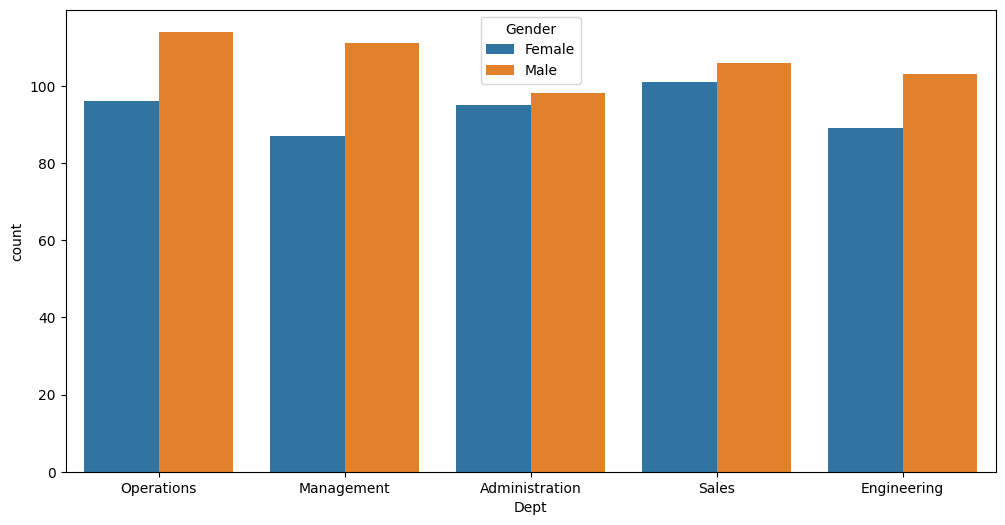

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Dept', hue='Gender')

<Axes: xlabel='Gender', ylabel='Dept'>

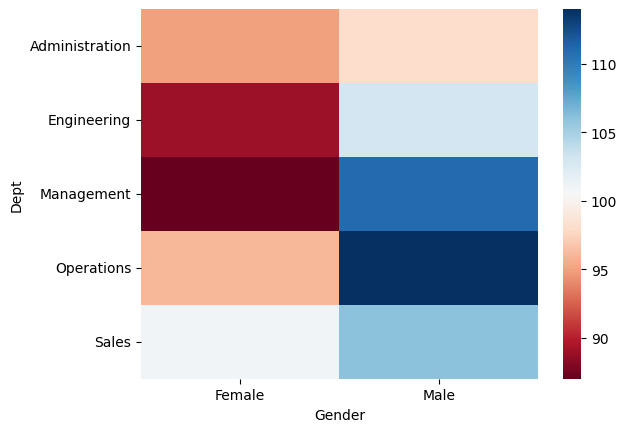

In [15]:
sns.heatmap(departmentData,cmap='RdBu')

from the plots we can have an initial guess that there is no dependancy between departments and gender.

In [16]:
x2, p_value, dof, expected_freq = stats.chi2_contingency(departmentData)
print(f"X2: {x2}, P value: {p_value}, degree of freedom: {dof}")


X2: 1.5505374579212654, P value: 0.8176532590847562, degree of freedom: 4


Since p value is > than 0.05 then we fail to reject which means that there is no prefrence between males and females when it comes to gender.


=================================Administration=================================


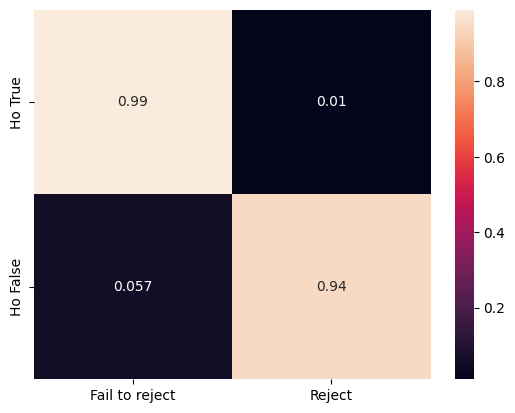

P Value = 0.22682676814348418, beta = 0.05739662147544663
Fail to reject

==================================Engineering===================================


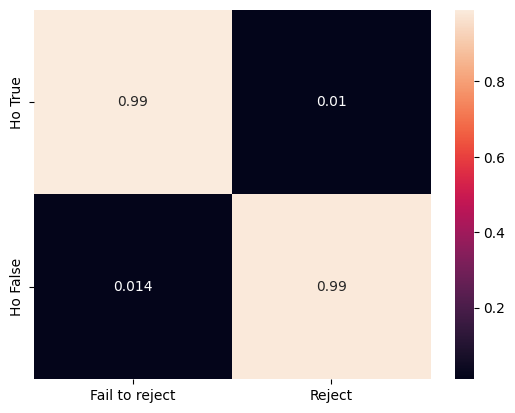

P Value = 0.4452013102831457, beta = 0.014314668633860455
Fail to reject

===================================Management===================================


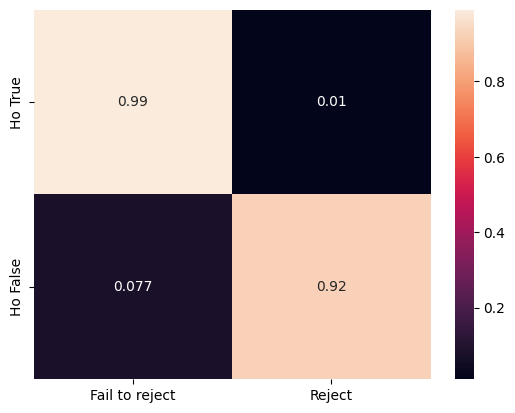

P Value = 0.18308470673397692, beta = 0.07741505156884129
Fail to reject

===================================Operations===================================


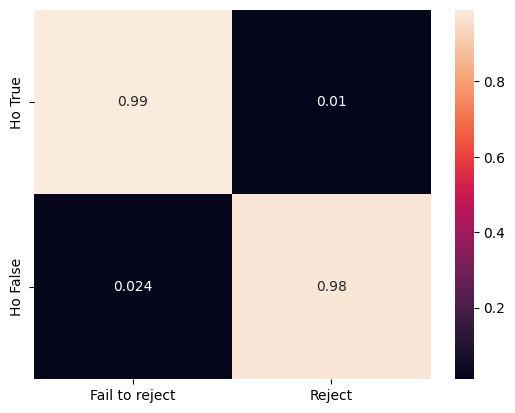

P Value = 0.3612403507093799, beta = 0.02435035784936022
Fail to reject

=====================================Sales======================================


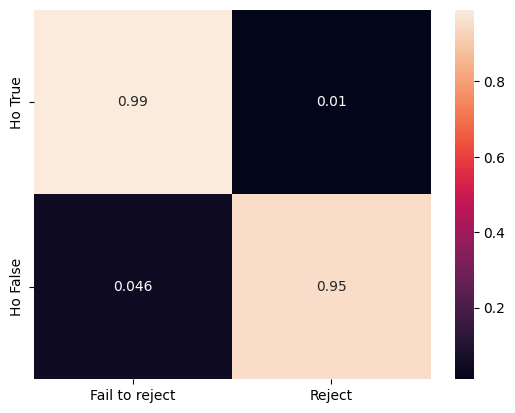

P Value = 0.2597859932742227, beta = 0.046251216588348985
Fail to reject


In [17]:
significance_level = 0.05/len(departmentData)
for dep in departmentData.index:
    print(f"\n{dep:=^80}")
    p1, p2 = departmentDataProp.loc[dep]
    n1, n2 = departmentData.sum()
    if (n1*p1 >= 10) and (n2*p2 >= 10): 
        p_value, beta = two_sample_proportion_test(p1, p2, n1, n2, significance_level)
        print(f"P Value = {p_value}, beta = {beta}")
        message = "Reject" if p_value < significance_level else "Fail to reject"
        print(message)
    else:
        print("no results")

form studing each deprtment it is shown that there is no dependancy between the given departments and gender as we failed to reject the null hypothesis for all the departments.